### And welcome to Week 4, Day 3 - more LangGraph..

In [1]:
from typing import Annotated
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.prebuilt import ToolNode, tools_condition
import requests
import os
from langchain_openai import ChatOpenAI
from typing import TypedDict


In [2]:
# Our favorite first step! Crew was doing this for us, by the way.
load_dotenv(override=True)

import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger("langsmith")
logger.setLevel(logging.DEBUG)


In [3]:
# Clear LangSmith's environment variable cache (Jupyter issue)
from langsmith import utils
utils.get_env_var.cache_clear()
print("Cache cleared - LangSmith will now use fresh environment variables")

Cache cleared - LangSmith will now use fresh environment variables


In [ ]:
from langsmith import Client

# Force initialize LangSmith client
client = Client()
print(f"LangSmith client initialized: {client.api_url}")
print(f"Connected to project: {os.getenv('LANGSMITH_PROJECT')}")

LangSmith client initialized: https://api.smith.langchain.com
Connected to project: pr-wooden-regard-3


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.smith.langchain.com:443
DEBUG:urllib3.connectionpool:https://api.smith.langchain.com:443 "GET /info HTTP/1.1" 200 922
DEBUG:langsmith.client:Tracing control thread func compress parallel called


In [5]:
# Verify LangSmith configuration
print("LANGSMITH_TRACING:", os.getenv("LANGSMITH_TRACING"))
print("LANGSMITH_ENDPOINT:", os.getenv("LANGSMITH_ENDPOINT"))
print("LANGSMITH_API_KEY:", os.getenv("LANGSMITH_API_KEY")[:20] + "..." if os.getenv("LANGSMITH_API_KEY") else None)
print("LANGSMITH_PROJECT:", os.getenv("LANGSMITH_PROJECT"))

LANGSMITH_TRACING: true
LANGSMITH_ENDPOINT: https://api.smith.langchain.com
LANGSMITH_API_KEY: lsv2_pt_ef01969c9dd6...
LANGSMITH_PROJECT: pr-wooden-regard-3


### First, let's go set up LangSmith!

https://langsmith.com

### Next, here is a useful function in LangChain community:

In [6]:
from langchain_community.utilities import GoogleSerperAPIWrapper

serper = GoogleSerperAPIWrapper()
serper.run("What is the capital of France?")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): google.serper.dev:443
DEBUG:urllib3.connectionpool:https://google.serper.dev:443 "POST /search?q=What+is+the+capital+of+France%3F&gl=us&hl=en&num=10 HTTP/1.1" 200 4469


"Paris is the capital and largest city of France, with an estimated city population of 2,048,472 in an area of 105.4 km2 (40.7 sq mi), and a metropolitan ... Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris has 2.234 million inhabitants end 2011. Paris is the capital and most populous city of France. Situated on the Seine River, in the north of the country, it is in the centre of the Île-de-France ... Paris, city and capital of France, located along the Seine River, in the north-central part of the country. Paris is one of the world's most ... Paris is the city of romance par excellence, the fashion capital and the best example of French art de vivre. Exploring Paris is an essential rite of passage ... Share your videos with friends, family, and the world. Surface area: 633,186 sq. km. · Population 66.6 million · Capital city: Paris · Official language: French · Currency: Euro (EUR) · System of ... Paris is the capital and 

### Now here is a LangChain wrapper class for converting functions into Tools

In [7]:
from langchain.agents import Tool

tool_search =Tool(
        name="search",
        func=serper.run,
        description="Useful for when you need more information from an online search"
    )



### Now we can try out the tool the langchain way

In [ ]:
tool_search.invoke("What is the capital of France?")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.smith.langchain.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): google.serper.dev:443
DEBUG:urllib3.connectionpool:https://api.smith.langchain.com:443 "GET /info HTTP/1.1" 200 922
DEBUG:langsmith.client:Tracing control thread func compress parallel called
DEBUG:langsmith.client:Sending multipart request with context: trace=2ff21a19-eb83-49f0-8167-845809aa9997,id=2ff21a19-eb83-49f0-8167-845809aa9997
DEBUG:urllib3.connectionpool:https://api.smith.langchain.com:443 "POST /runs/multipart HTTP/1.1" 403 22
DEBUG:urllib3.connectionpool:https://google.serper.dev:443 "POST /search?q=What+is+the+capital+of+France%3F&gl=us&hl=en&num=10 HTTP/1.1" 200 4351


"Paris is the capital and largest city of France, with an estimated city population of 2,048,472 in an area of 105.4 km2 (40.7 sq mi), and a metropolitan ... Paris is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants). Paris has 2.234 million inhabitants end 2011. Paris is the capital and most populous city of France. Situated on the Seine River, in the north of the country, it is in the centre of the Île-de-France ... Paris, city and capital of France, located along the Seine River, in the north-central part of the country. Paris is one of the world's most ... Paris is the city of romance par excellence, the fashion capital and the best example of French art de vivre. Exploring Paris is an essential rite of passage ... Share your videos with friends, family, and the world. Paris, the capital city of France, is often referred to as the “City of Light” (La Ville Lumière) due to its role as a center of enlightenment ... The capital of France h

DEBUG:langsmith.client:Sending compressed multipart request with context: trace=2ff21a19-eb83-49f0-8167-845809aa9997,id=2ff21a19-eb83-49f0-8167-845809aa9997; trace=bb9db990-1a00-4a4c-8a9a-b3b47b22564c,id=bb9db990-1a00-4a4c-8a9a-b3b47b22564c; trace=bb9db990-1a00-4a4c-8a9a-b3b47b22564c,id=bb9db990-1a00-4a4c-8a9a-b3b47b22564c
DEBUG:urllib3.connectionpool:https://api.smith.langchain.com:443 "POST /runs/multipart HTTP/1.1" 403 22
DEBUG:langsmith.client:Sending compressed multipart request with context: trace=3f1c1a38-cf31-4c3f-bc74-50e429ac99b4,id=3f1c1a38-cf31-4c3f-bc74-50e429ac99b4; trace=3f1c1a38-cf31-4c3f-bc74-50e429ac99b4,id=77a8978a-226f-4cd2-b0f6-60aef18e49a7; trace=3f1c1a38-cf31-4c3f-bc74-50e429ac99b4,id=0cc8d493-c361-4146-ac7e-89093c6443df
DEBUG:urllib3.connectionpool:https://api.smith.langchain.com:443 "POST /runs/multipart HTTP/1.1" 403 22
DEBUG:langsmith.client:Sending compressed multipart request with context: trace=3f1c1a38-cf31-4c3f-bc74-50e429ac99b4,id=0cc8d493-c361-4146-ac7

### And now let's write a tool ourselves

We'll pick a familiar one

In [9]:
pushover_token = os.getenv("PUSHOVER_TOKEN")
pushover_user = os.getenv("PUSHOVER_USER")
pushover_url = "https://api.pushover.net/1/messages.json"

def push(text: str):
    """Send a push notification to the user"""
    requests.post(pushover_url, data = {"token": pushover_token, "user": pushover_user, "message": text})

In [10]:
tool_push = Tool(
        name="send_push_notification",
        func=push,
        description="useful for when you want to send a push notification"
    )

tool_push.invoke("Hello, me")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.pushover.net:443
DEBUG:urllib3.connectionpool:https://api.pushover.net:443 "POST /1/messages.json HTTP/1.1" 200 None


### Back to the Graph from yesterday

One small change - using TypedDict instead of BaseModel for the State object

When we implement tools, we always need to make 2 changes to the code:

1. Changes to provide the tools to OpenAI in json when we make the call

2. Changes to handle the results back: look for the model staying that the finish_reason=="tool_calls" and then retrieve the call, run the function, provide the results.

### Bring them together

In [11]:
tools = [tool_search, tool_push]

In [12]:
# Step 1: Define the State object
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [13]:
# Step 2: Start the Graph Builder with this State class
graph_builder = StateGraph(State)

In [14]:
# This is different:

llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

In [15]:
# Step 3: Create a Node


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))

In [16]:
# Step 4: Create Edges


graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")

# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mermaid.ink:443
DEBUG:urllib3.connectionpool:https://mermaid.ink:443 "GET /img/LS0tCmNvbmZpZzoKICBmbG93Y2hhcnQ6CiAgICBjdXJ2ZTogbGluZWFyCi0tLQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCWNoYXRib3QoY2hhdGJvdCkKCXRvb2xzKHRvb2xzKQoJX19lbmRfXyhbPHA+X19lbmRfXzwvcD5dKTo6Omxhc3QKCV9fc3RhcnRfXyAtLT4gY2hhdGJvdDsKCWNoYXRib3QgLS4tPiBfX2VuZF9fOwoJY2hhdGJvdCAtLi0+IHRvb2xzOwoJdG9vbHMgLS0+IGNoYXRib3Q7CgljbGFzc0RlZiBkZWZhdWx0IGZpbGw6I2YyZjBmZixsaW5lLWhlaWdodDoxLjIKCWNsYXNzRGVmIGZpcnN0IGZpbGwtb3BhY2l0eTowCgljbGFzc0RlZiBsYXN0IGZpbGw6I2JmYjZmYwo=?type=png&bgColor=!white HTTP/1.1" 200 9405


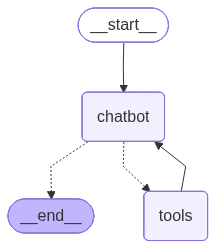

In [17]:
# Step 5: Compile the Graph
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

### That's it! And, let's do this:

In [ ]:
from langsmith import traceable

config = {"configurable": {"thread_id": "3"}}

@traceable(run_type="chain", name="langgraph_chat")
def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content

gr.ChatInterface(chat, type="messages").launch()


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443
DEBUG:httpcore.connection:connect_tcp.started host='api.gradio.app' port=443 local_address=None timeout=3 socket_options=None
DEBUG:asyncio:Using selector: KqueueSelector
DEBUG:httpcore.connection:connect_tcp.started host='127.0.0.1' port=7860 local_address=None timeout=None socket_options=None
DEBUG:httpcore.connection:connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x1113c6630>
DEBUG:httpcore.http11:send_request_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_headers.complete
DEBUG:httpcore.http11:send_request_body.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_body.complete
DEBUG:httpcore.http11:receive_response_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'date', b'Sun, 01 Feb 2026 12:58:31 GMT'), (b'server', b'uvicorn'), 

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443


DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /api/telemetry/gradio/initiated HTTP/1.1" 200 0
DEBUG:httpcore.connection:connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x1106fd4f0>
DEBUG:httpcore.connection:start_tls.started ssl_context=<ssl.SSLContext object at 0x11125d0d0> server_hostname='api.gradio.app' timeout=3
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /api/telemetry/gradio/launched HTTP/1.1" 200 0
DEBUG:httpcore.connection:start_tls.complete return_value=<httpcore._backends.sync.SyncStream object at 0x110f95ee0>
DEBUG:httpcore.http11:send_request_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_headers.complete
DEBUG:httpcore.http11:send_request_body.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_body.complete
DEBUG:httpcore.http11:receive_response_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b

## OK it's time to add Memory!

### BUT WAIT!

We have this whole Graph maintaining the state and appending to the state.

Why isn't this handling memory?

### This is a crucial point for understanding LangGraph

> A super-step can be considered a single iteration over the graph nodes. Nodes that run in parallel are part of the same super-step, while nodes that run sequentially belong to separate super-steps.


One "Super-Step" of the graph represents one invocation of passing messages between agents.

In idomatic LangGraph, you call invoke to run your graph for each super-step; for each interaction.

The reducer handles state updates automatically within one super-step, but not between them.

That is what checkpointing achieves.

In [19]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mermaid.ink:443
DEBUG:urllib3.connectionpool:https://mermaid.ink:443 "GET /img/LS0tCmNvbmZpZzoKICBmbG93Y2hhcnQ6CiAgICBjdXJ2ZTogbGluZWFyCi0tLQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCWNoYXRib3QoY2hhdGJvdCkKCXRvb2xzKHRvb2xzKQoJX19lbmRfXyhbPHA+X19lbmRfXzwvcD5dKTo6Omxhc3QKCV9fc3RhcnRfXyAtLT4gY2hhdGJvdDsKCWNoYXRib3QgLS4tPiBfX2VuZF9fOwoJY2hhdGJvdCAtLi0+IHRvb2xzOwoJdG9vbHMgLS0+IGNoYXRib3Q7CgljbGFzc0RlZiBkZWZhdWx0IGZpbGw6I2YyZjBmZixsaW5lLWhlaWdodDoxLjIKCWNsYXNzRGVmIGZpcnN0IGZpbGwtb3BhY2l0eTowCgljbGFzc0RlZiBsYXN0IGZpbGw6I2JmYjZmYwo=?type=png&bgColor=!white HTTP/1.1" 200 9405


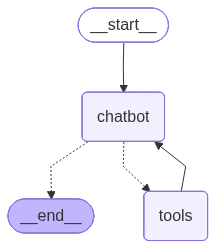

In [20]:
# Steps 1 and 2
graph_builder = StateGraph(State)


# Step 3
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    print(state)
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))

# Step 4
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

# Step 5
graph = graph_builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config = {"configurable": {"thread_id": "1"}}

def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

DEBUG:httpcore.connection:connect_tcp.started host='api.gradio.app' port=443 local_address=None timeout=3 socket_options=None
DEBUG:asyncio:Using selector: KqueueSelector
DEBUG:httpcore.connection:connect_tcp.started host='127.0.0.1' port=7861 local_address=None timeout=None socket_options=None
DEBUG:httpcore.connection:connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x1116f2180>
DEBUG:httpcore.http11:send_request_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_headers.complete
DEBUG:httpcore.http11:send_request_body.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_body.complete
DEBUG:httpcore.http11:receive_response_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'date', b'Sun, 01 Feb 2026 12:58:43 GMT'), (b'server', b'uvicorn'), (b'content-length', b'4'), (b'content-type', b'application/json')])
INFO:httpx:HTTP

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443


DEBUG:httpcore.connection:connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream object at 0x11146a6f0>
DEBUG:httpcore.connection:start_tls.started ssl_context=<ssl.SSLContext object at 0x1113f1250> server_hostname='api.gradio.app' timeout=3
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /api/telemetry/gradio/launched HTTP/1.1" 200 0
DEBUG:httpcore.connection:start_tls.complete return_value=<httpcore._backends.sync.SyncStream object at 0x11134f7a0>
DEBUG:httpcore.http11:send_request_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_headers.complete
DEBUG:httpcore.http11:send_request_body.started request=<Request [b'GET']>
DEBUG:httpcore.http11:send_request_body.complete
DEBUG:httpcore.http11:receive_response_headers.started request=<Request [b'GET']>
DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'Date', b'Sun, 01 Feb 2026 12:58:43 GMT'), (b'Content-Type', b'application/json'), 

{'messages': [HumanMessage(content='can you check USD/HUF rate and send a push notific', additional_kwargs={}, response_metadata={}, id='81c02f77-9513-4265-8bb7-078ed3bc6813')]}


DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'Date', b'Sun, 01 Feb 2026 12:59:01 GMT'), (b'Content-Type', b'application/json'), (b'Transfer-Encoding', b'chunked'), (b'Connection', b'keep-alive'), (b'access-control-expose-headers', b'X-Request-ID'), (b'openai-organization', b'user-vczvxe7auewoyirwiuyqsao0'), (b'openai-processing-ms', b'693'), (b'openai-project', b'proj_GdTumuCT6XjIjR7hQHoO4IJd'), (b'openai-version', b'2020-10-01'), (b'x-ratelimit-limit-requests', b'10000'), (b'x-ratelimit-limit-tokens', b'200000'), (b'x-ratelimit-remaining-requests', b'9999'), (b'x-ratelimit-remaining-tokens', b'199985'), (b'x-ratelimit-reset-requests', b'8.64s'), (b'x-ratelimit-reset-tokens', b'4ms'), (b'x-request-id', b'req_c944da58d5bc44b4aab00532a8e1d5a4'), (b'x-openai-proxy-wasm', b'v0.1'), (b'cf-cache-status', b'DYNAMIC'), (b'Set-Cookie', b'__cf_bm=_Csvel_ffaxK7WtaFng7oLMUX.l09SiAmWWP6FP9__4-1769950741-1.0.1.1-9vChMbFjVaTT1wdFOP.2de86JDn_7_oDc5K

{'messages': [HumanMessage(content='can you check USD/HUF rate and send a push notific', additional_kwargs={}, response_metadata={}, id='81c02f77-9513-4265-8bb7-078ed3bc6813'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qPachkkx1pEiZ1TVYErCN9we', 'function': {'arguments': '{"__arg1":"current USD to HUF exchange rate"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 100, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_1590f93f9d', 'id': 'chatcmpl-D4RKXQRErahtfCCiFagyeJemyZW7q', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0cc8d493-c361-4146-ac7e-89093c6443df-0', tool_calls=[{'name': 'search',

DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'Date', b'Sun, 01 Feb 2026 12:59:04 GMT'), (b'Content-Type', b'application/json'), (b'Transfer-Encoding', b'chunked'), (b'Connection', b'keep-alive'), (b'access-control-expose-headers', b'X-Request-ID'), (b'openai-organization', b'user-vczvxe7auewoyirwiuyqsao0'), (b'openai-processing-ms', b'785'), (b'openai-project', b'proj_GdTumuCT6XjIjR7hQHoO4IJd'), (b'openai-version', b'2020-10-01'), (b'x-ratelimit-limit-requests', b'10000'), (b'x-ratelimit-limit-tokens', b'200000'), (b'x-ratelimit-remaining-requests', b'9998'), (b'x-ratelimit-remaining-tokens', b'199977'), (b'x-ratelimit-reset-requests', b'14.769s'), (b'x-ratelimit-reset-tokens', b'6ms'), (b'x-request-id', b'req_4e1c5470630d46d4ac997ed18d8c324f'), (b'x-openai-proxy-wasm', b'v0.1'), (b'cf-cache-status', b'DYNAMIC'), (b'Strict-Transport-Security', b'max-age=31536000; includeSubDomains; preload'), (b'X-Content-Type-Options', b'nosniff'), 

{'messages': [HumanMessage(content='can you check USD/HUF rate and send a push notific', additional_kwargs={}, response_metadata={}, id='81c02f77-9513-4265-8bb7-078ed3bc6813'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qPachkkx1pEiZ1TVYErCN9we', 'function': {'arguments': '{"__arg1":"current USD to HUF exchange rate"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 100, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_1590f93f9d', 'id': 'chatcmpl-D4RKXQRErahtfCCiFagyeJemyZW7q', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0cc8d493-c361-4146-ac7e-89093c6443df-0', tool_calls=[{'name': 'search',

DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'Date', b'Sun, 01 Feb 2026 12:59:05 GMT'), (b'Content-Type', b'application/json'), (b'Transfer-Encoding', b'chunked'), (b'Connection', b'keep-alive'), (b'access-control-expose-headers', b'X-Request-ID'), (b'openai-organization', b'user-vczvxe7auewoyirwiuyqsao0'), (b'openai-processing-ms', b'566'), (b'openai-project', b'proj_GdTumuCT6XjIjR7hQHoO4IJd'), (b'openai-version', b'2020-10-01'), (b'x-ratelimit-limit-requests', b'10000'), (b'x-ratelimit-limit-tokens', b'200000'), (b'x-ratelimit-remaining-requests', b'9997'), (b'x-ratelimit-remaining-tokens', b'199973'), (b'x-ratelimit-reset-requests', b'22.077s'), (b'x-ratelimit-reset-tokens', b'7ms'), (b'x-request-id', b'req_55589ce4e11042ec8d7bc2a07ae6c748'), (b'x-openai-proxy-wasm', b'v0.1'), (b'cf-cache-status', b'DYNAMIC'), (b'Strict-Transport-Security', b'max-age=31536000; includeSubDomains; preload'), (b'X-Content-Type-Options', b'nosniff'), 

In [ ]:
graph.get_state(config)

In [ ]:
# Most recent first

list(graph.get_state_history(config))

### LangGraph gives you tools to set the state back to a prior point in time, to branch off:

```
config = {"configurable": {"thread_id": "1", "checkpoint_id": ...}}
graph.invoke(None, config=config)
```

And this allows you to build stable systems that can be recovered and rerun from any prior checkpoint.

### And now let's store in SQL

### And this is the power of LangGraph.

In [ ]:
import sqlite3
from langgraph.checkpoint.sqlite import SqliteSaver

db_path = "memory.db"
conn = sqlite3.connect(db_path, check_same_thread=False)
sql_memory = SqliteSaver(conn)

In [ ]:
# Steps 1 and 2
graph_builder = StateGraph(State)


# Step 3
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    print(state)
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))

# Step 4
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

# Step 5
graph = graph_builder.compile(checkpointer=sql_memory)
display(Image(graph.get_graph().draw_mermaid_png()))
 

In [ ]:
config = {"configurable": {"thread_id": "3"}}

def chat(user_input: str, history):
    result = graph.invoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()